 # Práctica de aprendizaje automático (parte 2)

Entrega este cuaderno habiendo **ejecutado todas las celdas**. Incluye en la entrega **todos los ficheros necesarios para su ejecución**.

Asegúrate de que la presentación está bien estructurada: Se valorará la **claridad, concisión, y completitud** del informe.

Se trata de una práctica abierta: **sé intrépido y explora**. 

1. Describe las características de los datos:
    * Tipo de datos (e.g. [https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)))
    * Número de ejemplos de cada una de las clases.
    * Número y tipo (nominales no ordenados, nominales ordenados, numéricos) de atributos.

Esta información se debería utilizar en el análisis; por ejemplo, si se selecciona un atributo para la predicción, ¿es clara su relevancia por el tipo de información que proporciona de acuerdo con nuestro conocimiento experto sobre el área?
    
2. Detalla la metodología utilizada:
    * Partición de los datos: tamaño de los conjuntos de entrenamiento y test, uso de estratificación en el muestreo.
    * Preprocesamiento: codificación de los atributos, construcción y selección de características, normalización, etc. (¡solo se debe utilizar la información del conjunto de entrenamiento!)
    * Determinación de los hiperparámetros; por ejemplo, mediante búsqueda en rejilla y validación cruzada.
    * Estimación del error de generalización y su incertidumbre.
2. Resume los resultados en gráficas y tablas.
3. Elabora esta información e ilustra tus observaciones con los resultados obtenidos.
4. Proporciona una recomendación final:
    * Tipo de clasificador.
    * Configuración del clasificador (arquitectura, hiperparámetros, etc.) y método de entrenamiento (función de coste, método de optimización, uso de técnicas de regularización,...)
    * Para el predictor final, proporciona los errores de entrenamiento, validación cruzada y test.
5. Resume las conclusiones del análisis.

## 2. Construcción de un clasificador en una base de datos real (4.5 puntos)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [3]:
df = pd.read_csv('./data/german_credit_data.csv', sep=';')
# Source: https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)
# This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix

print(df.shape)
df.head(5)

(1000, 21)


,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [4]:
class_label = 'default'
feature_names = list(df.columns)
feature_names.remove(class_label)
print(feature_names)
X = df[feature_names].values
y = df[class_label].values

['account_check_status ', 'duration_in_month ', 'credit_history ', 'purpose ', 'credit_amount ', 'savings ', 'present_emp_since ', 'installment_as_income_perc ', 'personal_status_sex ', 'other_debtors ', 'present_res_since ', 'property ', 'age ', 'other_installment_plans ', 'housing ', 'credits_this_bank ', 'job ', 'people_under_maintenance ', 'telephone ', 'foreign_worker']


**Estadísticos básicos de cada atributo:**

In [4]:
df.describe()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,0.458487,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,1.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


**Datos codificados de forma numérica**

In [5]:
df = pd.read_csv('./data/german_credit_data_numeric.csv', sep=';')
class_label = 'Class'
feature_names = list(df.columns)
feature_names.remove(class_label)
print(feature_names)
X = df[feature_names].values
y = df[class_label].values

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23']


**Histogramas suavizados de cada atributo en cada clase. El color indica la clase ("default"/"no default"):**

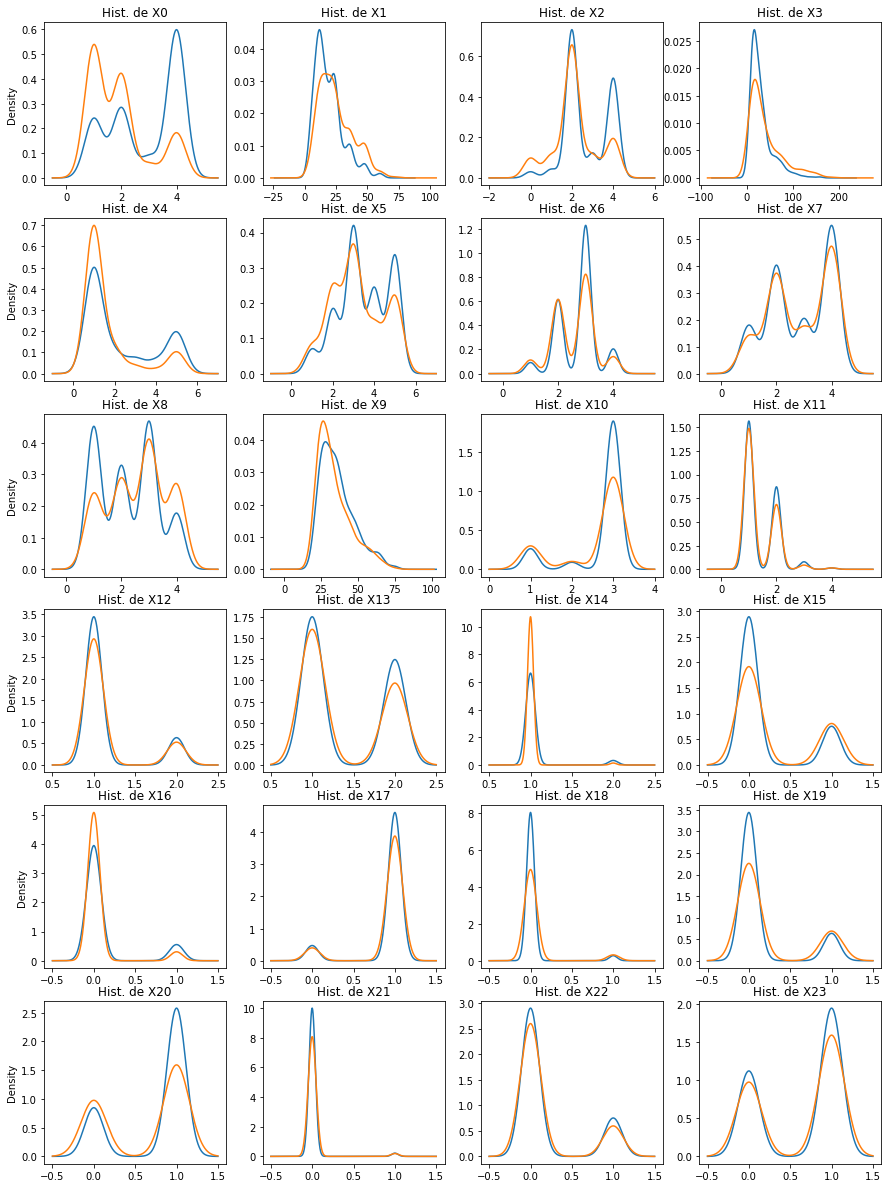

In [6]:
plt.figure(figsize=(15, 21))
n_cols_plot = 4
n_rows_plot = int(len(feature_names) / n_cols_plot)
for i,n in enumerate(feature_names):
    plt.subplot(n_rows_plot, n_cols_plot, i+1)
    aux = 'Density' if i%n_cols_plot == 0 else ''
    df.groupby('Class')[n].plot(kind='kde', title='Hist. de '+n)
    plt.ylabel(aux)

## Entrenamiento de un modelo y chequeo de su calidad usando 5-fold cross validation

La siguiente celda entrena un modelo y lo evalúa en varias particiones training-test diferentes de los datos. El resultado es un score medio junto a su desviación estándar. El tipo de modelo (Naïve Bayes / árbol de decisión / knn/ regresión logística / red neuronal) y parámetros empleados deberán ser seleccionados para que dicho resultado sea el mejor posible.

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# otros clasificadores (del notebook p4_01)

clf = KNeighborsClassifier(n_neighbors=1) # DecisionTreeClassifier(max_depth=3)
scores = cross_val_score(clf, X, y, cv=10) # 10-fold cross-validation
print('Precisión en cada una de las particiones: ', scores)
print('Estimación de la precisión por validación cruzada: {:.2f} +/- {:.2f}'.format(scores.mean(), scores.std()))

Precisión en cada una de las particiones:  [0.67 0.64 0.72 0.66 0.64 0.71 0.6  0.71 0.62 0.66]
Estimación de la precisión por validación cruzada: 0.66 +/- 0.04


## Responde aquí a las siguientes preguntas:

* Haz una gráfica que muestre la dependencia de la precisión de un clasificador de vecinos próximos con el número de vecinos. Si es más conveniente, utiliza gráficas en escala logarítmica para alguno de los ejes (`semilogx`, `semilogy`, `loglog`).
* Utilizando los conceptos de sub- y sobreajuste:
    * Comenta los resultados cuando el número de vecinos es pequeño.
    * Comenta los resultados cuando el número de vecinos es grande.
    * Explica el significado del valor de la precisión cuando el número de vecinos toma el valor mayor posible.
* ¿Cuál es la mejor precisión que se alcanza con k-nn y para qué k (valor de `n_neighbours`)?
* ¿Cuál es la mejor precisión que se alcanza con un árbol de decisión y con qué profundidad máxima (valor de `max_depth`)? Para ello, haz una gráfica que muestre la dependencia de la precisión con la profundidad máxima del árbol. Comenta los resultados.
* ¿Cuál es la mejor precisión que se alcanza con una red neuronal con una sola capa oculta y con qué configuración (valor de `hidden_layer_sizes`)? Para ello, haz una gráfica que muestre la dependencia de la precisión con el número de nodos en la capa oculta. Comenta los resultados.
* ¿Cuál es la mejor precisión que se alcanza con una red neuronal con varias capas ocultas y con qué configuración? Para ello, haz una gráfica que muestre la dependencia de la precisión con el número de capas ocultas, suponiendo constante el número de nodos en cada capa oculta. Comenta los resultados.
* Resume los resultados y conclusiones del estudio realizado.

**Además de gráficas, puede ser conveniente presentar los resultados en forma de tablas.**


Inicializamos el German Credit data set, que sera el banco de datos que utilizaremos para responder a las preguntas planteadas.

Hemos Elegido este banco de datos ya que es al que se hace referencia a lo largo de este documento.

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Load German Credit Data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
header = ['ExistingAccount', 'DurationMonth', 'CreditHistory', 'Purpose', 'CreditAmount',
          'Savings', 'EmploymentSince', 'InstallmentRate', 'Personal', 'OtherDebtors',
          'ResidentSince', 'Property', 'Age', 'OtherPlans', 'Housing',
          'NumCreditsAtBank', 'Job', 'NumDependents', 'Telephone', 'Foreign', 'Credit']

data = pd.read_csv(url, names=header, delimiter=' ')

# Split into features and target variable
X = data.drop('Credit', axis=1)
y = data['Credit']

# Split into training and test set
encoder = OneHotEncoder(handle_unknown="ignore")
X = encoder.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)


seeds = list(range(39, 49))


* Haz una gráfica que muestre la dependencia de la precisión de un clasificador de vecinos próximos con el número de vecinos. Si es más conveniente, utiliza gráficas en escala logarítmica para alguno de los ejes (`semilogx`, `semilogy`, `loglog`).

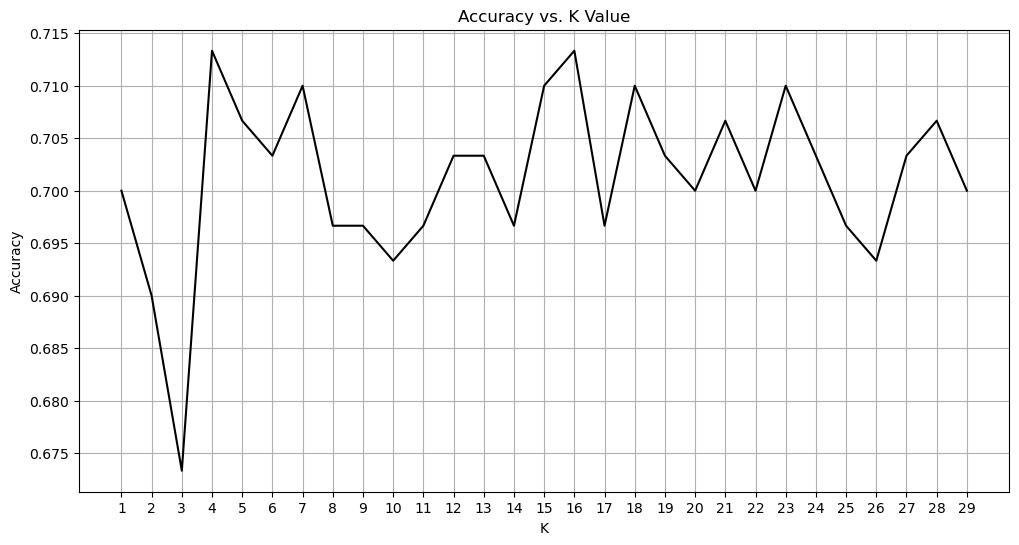

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Range of k for KNN
k_range = range(1, 30)

# List to store accuracy
accuracy_list = []

# Loop over different values of k
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_list.append(accuracy_score(y_test, y_pred))


plt.figure(figsize=(12, 6))
plt.plot(k_range, accuracy_list, color='black', linestyle='solid')
plt.xticks(k_range)  # Show all x values
plt.grid(True)  # Add grid
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

* Utilizando los conceptos de sub- y sobreajuste:
    * Comenta los resultados cuando el número de vecinos es pequeño.
    * Comenta los resultados cuando el número de vecinos es grande.
    * Explica el significado del valor de la precisión cuando el número de vecinos toma el valor mayor posible.

Como podemos observar, k-nn para el dataset analizado alcanza su valor máximo de precisión (0.713) con k = 4. Los valores menores tienen menor precisión debido a que sufren de subajuste, esto es que el número de vecinos es menor al óptimo. Por otra parte vemos que si damos un valor de k > 4 el valor de precisión vuelve a disminuir debido a que empieza a sufrir de sobreajuste. 



* ¿Cuál es la mejor precisión que se alcanza con k-nn y para qué k (valor de `n_neighbours`)?

La gráfica muestra que la precisión mas alta alcanzada con k-nn es de 0.73 para un valor de k = 9. Más adelante estudiaremos como hallar el valor óptimo para este y otros hiperparámetros. Durante esta sección de la práctica responderemos a las preguntas utilizando las gráficas proporcionadas.

* ¿Cuál es la mejor precisión que se alcanza con un árbol de decisión y con qué profundidad máxima (valor de `max_depth`)? Para ello, haz una gráfica que muestre la dependencia de la precisión con la profundidad máxima del árbol. Comenta los resultados.

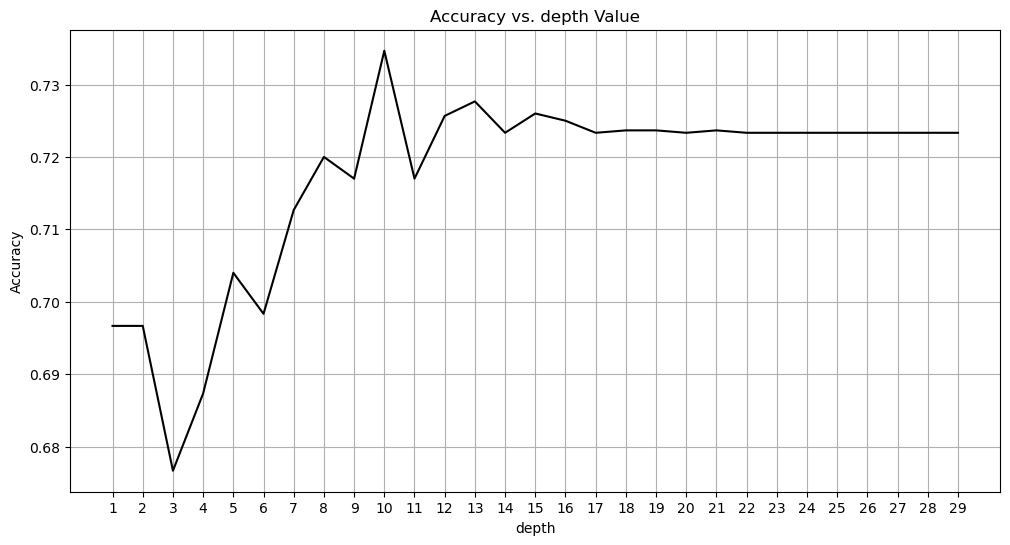

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# depth of the tree
depth = range(1, 30)

# List to store accuracy
accuracy_list = [0 for _ in depth]

for seed in seeds:
    # Loop over different values of depth
    for i in depth:
        decition_tree = DecisionTreeClassifier(max_depth=i, random_state=seed)
        decition_tree.fit(X_train, y_train)
        y_pred = decition_tree.predict(X_test)
        accuracy_list[i-1] += accuracy_score(y_test, y_pred)/len(seeds)
# Plot accuracy vs depth
plt.figure(figsize=(12, 6))
plt.plot(k_range, accuracy_list, color='black', linestyle='solid')
plt.xticks(k_range)  
plt.grid(True)  
plt.title('Accuracy vs. depth Value')
plt.xlabel('depth')
plt.ylabel('Accuracy')
plt.show()

En este caso, el valor óptimo de la profundidad es 10 , dando un score ligeramente mayor a 0.73. Al igual que antes, los valores menores a este alcanzan una precisión menor debido al subajuste. Por otra parte los valores mayores tienen un score menor debido al sobreajuste.

* ¿Cuál es la mejor precisión que se alcanza con una red neuronal con una sola capa oculta y con qué configuración (valor de `hidden_layer_sizes`)? Para ello, haz una gráfica que muestre la dependencia de la precisión con el número de nodos en la capa oculta. Comenta los resultados.


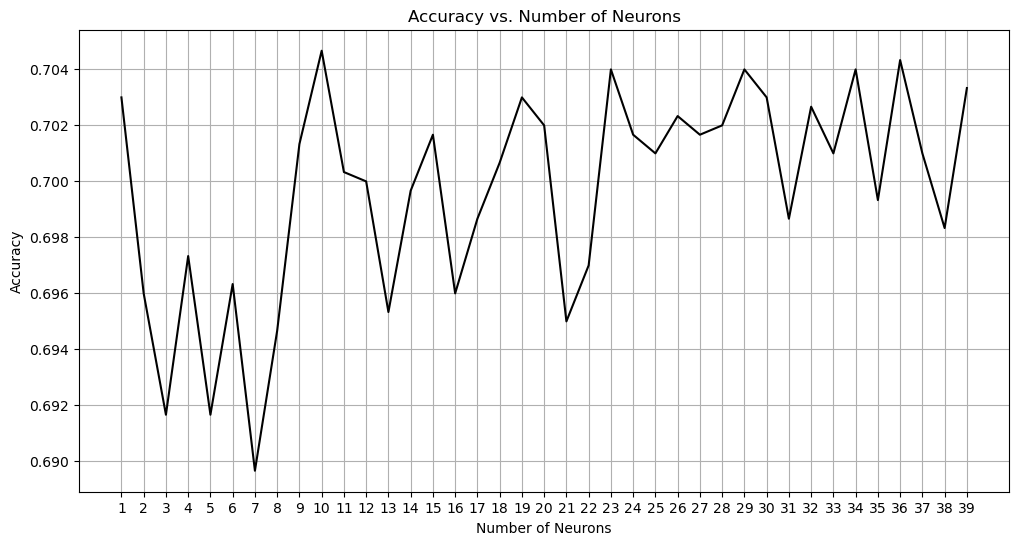

In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Number of neurons in the hidden layer
neurons = range(1, 40)

accuracy_list = [0 for _ in neurons]

for seed in seeds:
    # Loop over different number of neurons
    for i in neurons:
        mlp = MLPClassifier(hidden_layer_sizes=(i,), max_iter=2000, random_state=seed)
        mlp.fit(X_train, y_train)
        y_pred = mlp.predict(X_test)
        accuracy_list[i-1] += accuracy_score(y_test, y_pred)/len(seeds)
    

# Plot accuracy vs number of neurons
plt.figure(figsize=(12, 6))
plt.plot(neurons, accuracy_list, color='black', linestyle='solid')
plt.xticks(neurons)  
plt.grid(True)  
plt.title('Accuracy vs. Number of Neurons')
plt.xlabel('Number of Neurons')
plt.ylabel('Accuracy')
plt.show()


En la imágen observamos que con 10 neuronas obtenemos una precisión apróximadamente igual a 0.7. Nuevamente, para un número menor de neuronas obtenemos una precisión menor (subajuste) y observamos que a medida que aumentamos el número de neuronas el valor de la precisión tiende a decrecer.

* ¿Cuál es la mejor precisión que se alcanza con una red neuronal con varias capas ocultas y con qué configuración? Para ello, haz una gráfica que muestre la dependencia de la precisión con el número de capas ocultas, suponiendo constante el número de nodos en cada capa oculta. Comenta los resultados.


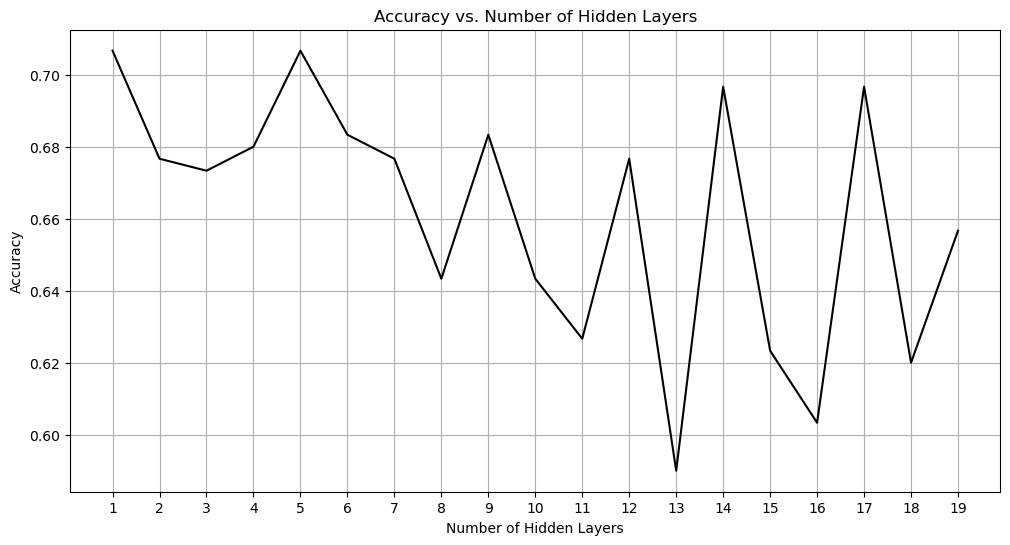

In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Number of neurons in the hidden layer
neurons = 10

# Number of hidden layers
layers = range(1, 20)

accuracy_list = [0 for _ in layers]

for seed in seeds:  
    # Loop over different ammount of hidden layers
    for i in layers:
        mlp = MLPClassifier(hidden_layer_sizes=(neurons,) * i, max_iter=2000, random_state=42)
        mlp.fit(X_train, y_train)
        y_pred = mlp.predict(X_test)
        accuracy_list[i-1] += accuracy_score(y_test, y_pred)/len(seeds)
# Plot accuracy vs number of hidden layers
plt.figure(figsize=(12, 6))
plt.plot(layers, accuracy_list, color='black', linestyle='solid')
plt.xticks(layers)
plt.grid(True)
plt.title('Accuracy vs. Number of Hidden Layers')
plt.xlabel('Number of Hidden Layers')
plt.ylabel('Accuracy')
plt.show()


En este caso variamos el número de capas ocultas, pero el número de neuronas se mantiene igual (en este caso 10) consiguiendo una precisión máxima de 0.7 apróximadamente con 5 capas ocultas y manteniendo los mismos patrones de sub y sobre ajuste que en los casos anteriores.

* Resume los resultados y conclusiones del estudio realizado.

Observamos que para todas las estrategias se sigue un mismo patrón, que son valores de precisión que tienden a crecer hasta llegar a un valor óptimo en el cual la precisión es máxima, tras el cual los valores de precisión toman una tendencia decreciente (o simplemente empiezan a ser menores al máximo y a puntuar de manera errática).


## Procesamiento

En ocasiones, en lugar de utilizar modelos más complejos, es más útil invertir más tiempo en el procesamiento de los datos para conseguir mejores resultados.

En este apartado vas a investigar mecanismos para preparar los datos y obtener (en principio) mejores resultados: construcción y selección de atributos, preprocesamiento (detección de outliers, missing values, centrado y escalado).

Razona por qué decides probar o ignorar alguno de estos métodos, y cómo cambian los resultados al aplicarlos (puedes crear tantas celdas como consideres oportunas).
Usa tablas, gráficas y código, según sea necesario, para ilustrar tus observaciones.

*Descargando los datos y visualizando los datos* 

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Load German Credit Data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
header = ['ExistingAccount', 'DurationMonth', 'CreditHistory', 'Purpose', 'CreditAmount',
          'Savings', 'EmploymentSince', 'InstallmentRate', 'Personal', 'OtherDebtors',
          'ResidentSince', 'Property', 'Age', 'OtherPlans', 'Housing',
          'NumCreditsAtBank', 'Job', 'NumDependents', 'Telephone', 'Foreign', 'Credit']

data = pd.read_csv(url, names=header, delimiter=' ')

print(data.head())

  ExistingAccount  DurationMonth CreditHistory Purpose  CreditAmount Savings  \
0             A11              6           A34     A43          1169     A65   
1             A12             48           A32     A43          5951     A61   
2             A14             12           A34     A46          2096     A61   
3             A11             42           A32     A42          7882     A61   
4             A11             24           A33     A40          4870     A61   

  EmploymentSince  InstallmentRate Personal OtherDebtors  ...  Property Age  \
0             A75                4      A93         A101  ...      A121  67   
1             A73                2      A92         A101  ...      A121  22   
2             A74                2      A93         A101  ...      A121  49   
3             A74                2      A93         A103  ...      A122  45   
4             A73                3      A93         A101  ...      A124  53   

   OtherPlans Housing NumCreditsAtBank   Job

Tras visualizar y entender los datos desccargados, hemos decidido analizar los outliers, el escalado y el centrado.

# Outliers

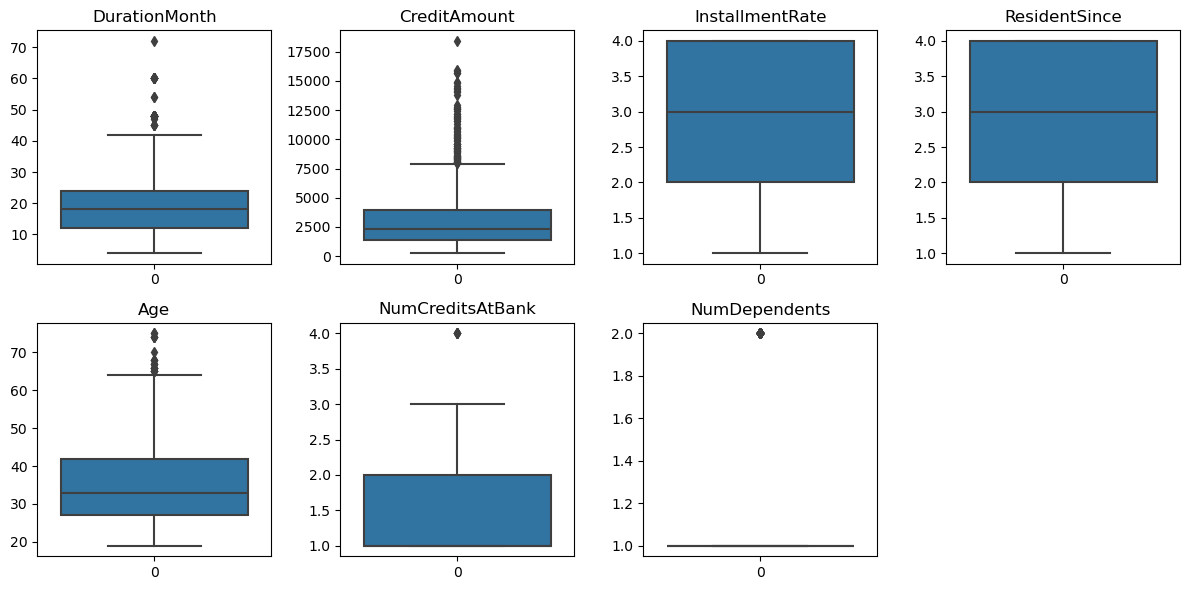

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# variables que podrian contener outliers (variables numericas)
num_vars = ['DurationMonth', 'CreditAmount', 'InstallmentRate', 'ResidentSince', 'Age', 'NumCreditsAtBank', 'NumDependents']



plt.figure(figsize=(12, 6))
for i, var in enumerate(num_vars):
    plt.subplot(2, 4, i+1)
    sns.boxplot(data[var])
    plt.title(var)
plt.tight_layout()
plt.show()


Apreciamos en las graficas valores que se salen de la tendencia de los datos, los denominados outliers. Estos valores pueden afectar negativamente en el entrenamiento de los modelos. Existen varias alternativas, como por ejemplo eliminarlos, sustituirlos por la media o la mediana, o simplemente dejarlos como están. En este caso hemos optado por el Winsorizado, que consiste en sustituir los valores que se salen de un rango por los valores que se encuentran en el limite de dicho rango. En este caso hemos optado por el rango [0.05, 0.95].

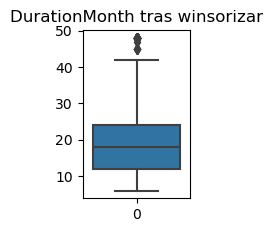

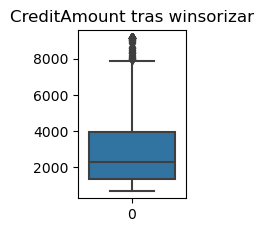

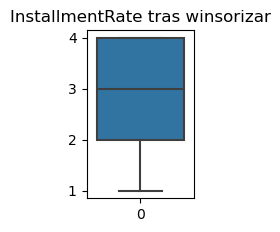

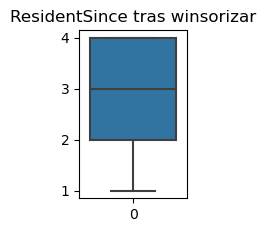

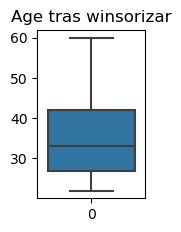

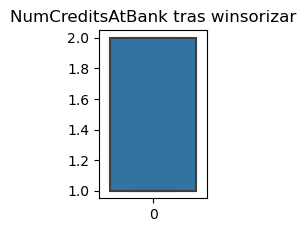

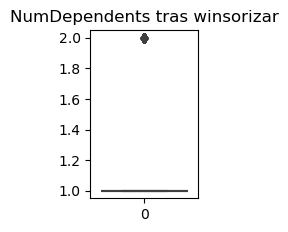

In [9]:
from scipy.stats.mstats import winsorize

# Winsorizamos todas las variables
for var in num_vars:
    data[var] = winsorize(data[var], limits=[0.05, 0.05])
    plt.subplot(2, 4, i+1)
    sns.boxplot(data[var])
    plt.title(f'{var} tras winsorizar')
    plt.show()

Como podemos observar, ahora los datos se encuentran más centrados y hay significativamente menos valores que se salen de la tendencia de los datos, lo cual beneficiara al entrenamiento de los modelos.

# Escalado


array([[<Axes: title={'center': 'DurationMonth'}>,
        <Axes: title={'center': 'CreditAmount'}>,
        <Axes: title={'center': 'InstallmentRate'}>],
       [<Axes: title={'center': 'ResidentSince'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'NumCreditsAtBank'}>],
       [<Axes: title={'center': 'NumDependents'}>, <Axes: >, <Axes: >]],
      dtype=object)

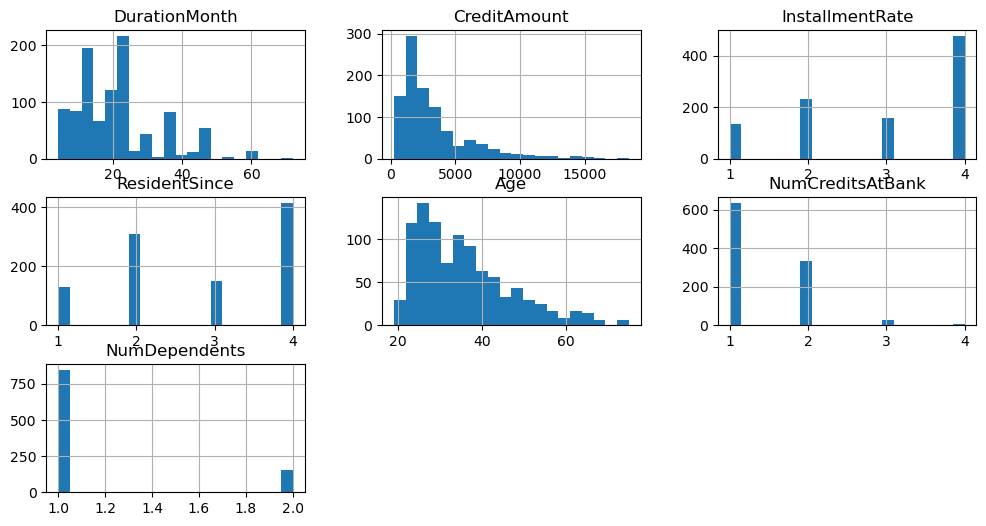

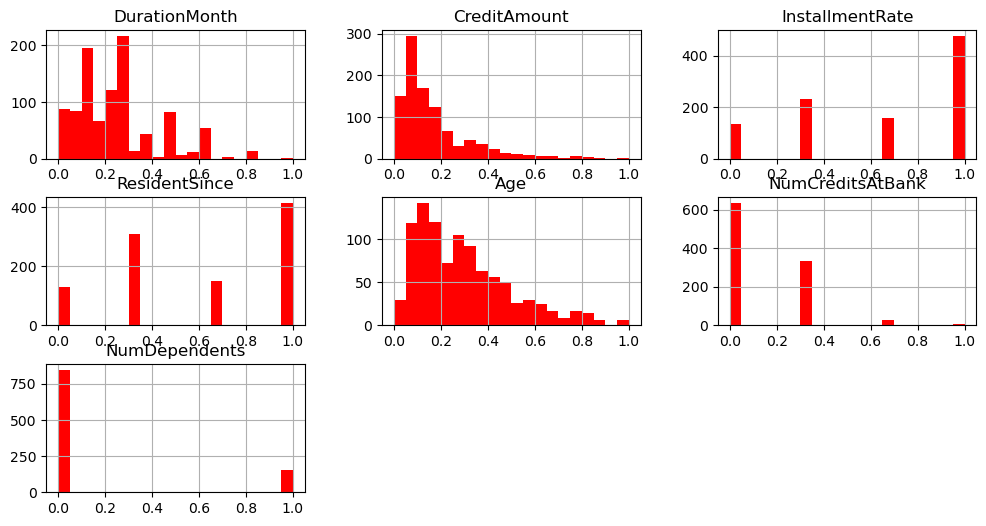

In [7]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
X = data.drop('Credit', axis=1)
y = data['Credit']

# nuevamente, seleccionamos las columnas con valor numerico
num_vars = ['DurationMonth', 'CreditAmount', 'InstallmentRate', 'ResidentSince', 'Age', 'NumCreditsAtBank', 'NumDependents']

# vemos la distribucion antes del escalado


X = pd.get_dummies(X)


X[num_vars].hist( bins=20, figsize=(12, 6))
X_scaled = X.copy()
# escalamos las variables numericas

scaler = MinMaxScaler()
X_scaled[num_vars] = scaler.fit_transform(X[num_vars])

# vemos la distribucion despues del escalado
X_scaled[num_vars].hist(bins=20, figsize=(12, 6), color='red')

Despues de escalar, vemos que ahora todos los valores se mueven en rangos muy similares, esto es muy beneficioso para los modelos de entrenamiento. Entre algunos de estos beneficios encontramos el aumento de estabilidad numérica, haciendo que algoritmos como k-nn sean más precisos ya que no se verán afectados por la escala de los datos. Otro beneficio es que los algoritmos de entrenamiento convergen más rápido, ya que al estar los datos en rangos similares, los algoritmos de entrenamiento no tienen que hacer tantas iteraciones para llegar a un resultado óptimo. También, a la hora de analizar datos que puedan tener valores muy grandes, debido a que los computadores pueden almacenar un número finito de dígitos, los algoritmos de entrenamiento pueden dar resultados erróneos.

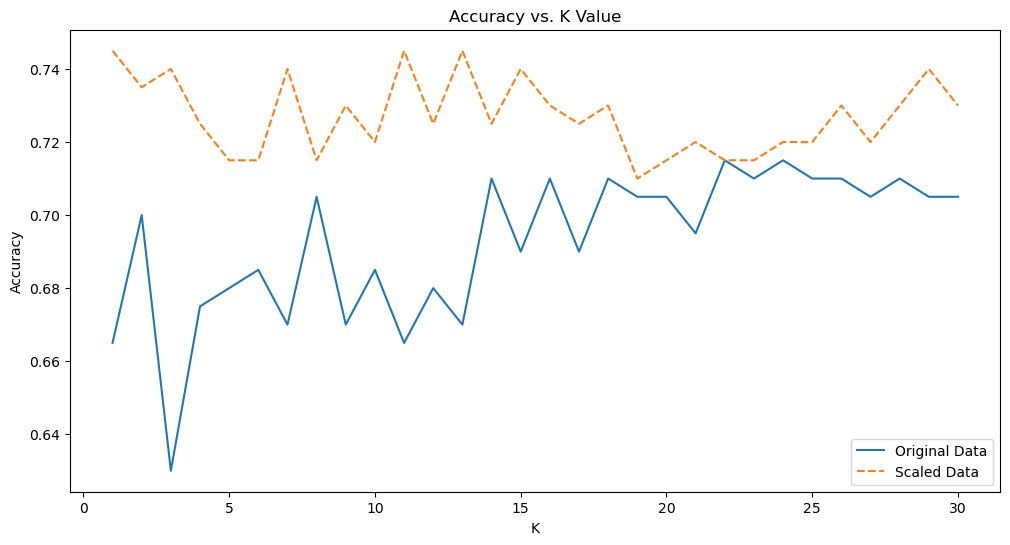

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# dividimos en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# copiamos los datos para no modificar los originales
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# escalamos las variables numericas
scaler = MinMaxScaler()
X_train_scaled[num_vars] = scaler.fit_transform(X_train_scaled[num_vars])
X_test_scaled[num_vars] = scaler.transform(X_test_scaled[num_vars])

k_range = range(1, 31)

accuracy_scores = []
accuracy_scores_scaled = []

for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train.values, y_train.values)
    y_pred = knn.predict(X_test.values)
    accuracy_scores.append(accuracy_score(y_test.values, y_pred))

    knn_scaled = KNeighborsClassifier(n_neighbors=i)
    knn_scaled.fit(X_train_scaled.values, y_train.values)
    y_pred_scaled = knn_scaled.predict(X_test_scaled.values)
    accuracy_scores_scaled.append(accuracy_score(y_test.values, y_pred_scaled))

plt.figure(figsize=(12, 6))
plt.plot(k_range, accuracy_scores, label='Original Data')
plt.plot(k_range, accuracy_scores_scaled, label='Scaled Data', linestyle='--')
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Como podemos apreciar, cuando preparamos los datos el algoritmo de k-nn es más preciso que sin preparar los datos. También es importante mencionar que, para evitar el "data leakage", primero separamos los datos en training y test, y luego aplicamos la preparación de los datos por separado, de esta manera, los datos con los que probaremos el modelo no afectaran a los datos que usaremos para entrenarlo.

Esto es importante ya que el data leakage puede hacer que el modelo sea más preciso, pero solo porque los datos de test han sido modificados por los datos de training, y por lo tanto no es un resultado realista.

# Centrado

array([[<Axes: title={'center': 'DurationMonth'}>,
        <Axes: title={'center': 'CreditAmount'}>,
        <Axes: title={'center': 'InstallmentRate'}>],
       [<Axes: title={'center': 'ResidentSince'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'NumCreditsAtBank'}>],
       [<Axes: title={'center': 'NumDependents'}>, <Axes: >, <Axes: >]],
      dtype=object)

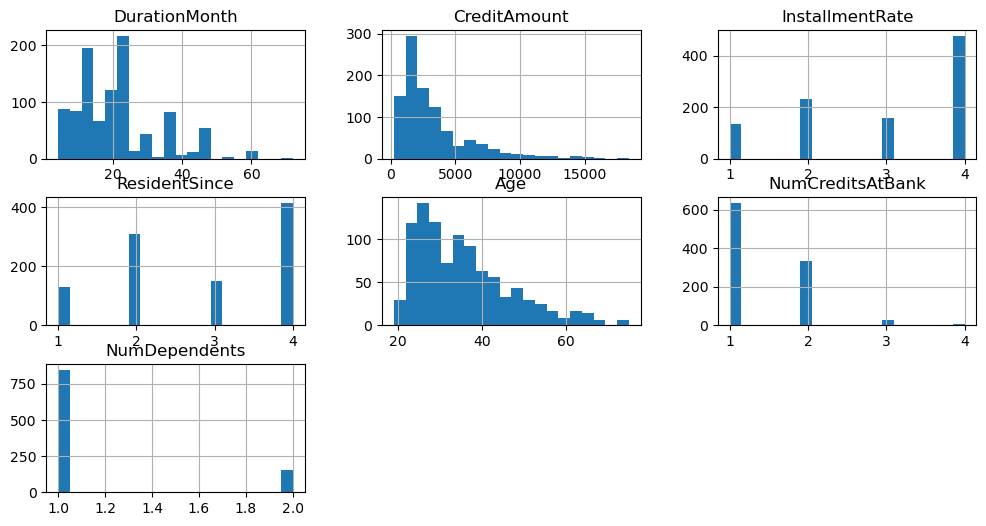

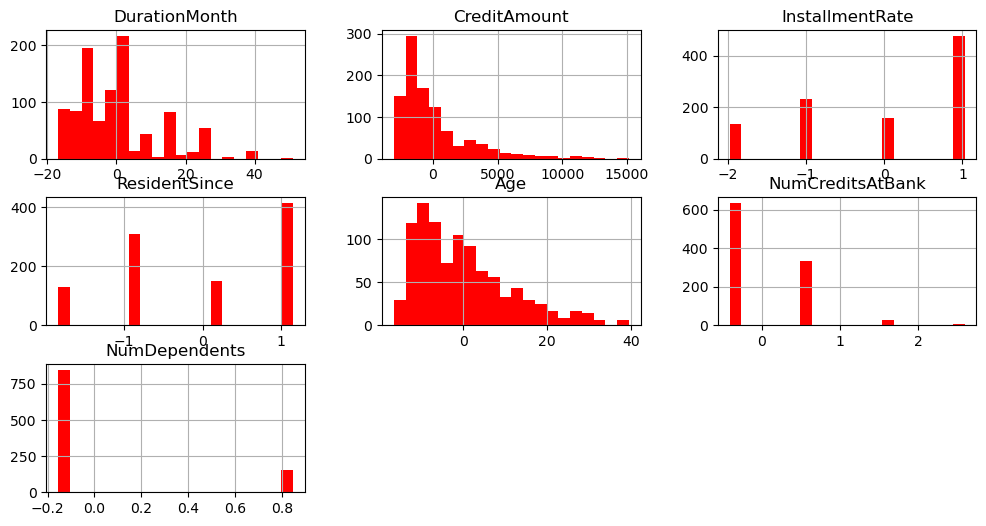

In [16]:
from sklearn.preprocessing import StandardScaler

# copiamos los datos para no modificar los originales
X_centered = X.copy()

# mostramos los datos antes del escalado
X_centered[num_vars].hist(bins=20, figsize=(12, 6))

# inicializamos el escalador (para que use la media en lugar de la varanza para centrar)
scaler_centering = StandardScaler(with_mean=True, with_std=False)

# aplicamos el escalado
X_centered[num_vars] = scaler_centering.fit_transform(X[num_vars])

# mostramos los datos despues del escalado
X_centered[num_vars].hist(bins=20, figsize=(12, 6), color='red')

El centrado de datoss es similar al escalado, solo que este, en lugar de hacer que los datos se muevan en rangos similares, hace que los datos tengan una media de 0. Esto es beneficioso para algunos modelos de entrenamiento, como por ejemplo los modelos lineales, ya que estos asumen que los datos tienen una media de 0. Tiene otros beneficios como mejorar la estabilidad númerica. 

Centrar los datos puede ser beneficioso para algunos modelos de entrenamiento, pero no para todos. Por ejemplo, en el caso de k-nn, no es beneficioso ya que este algoritmo no asume nada sobre los datos, y por lo tanto no se verá afectado por el centrado de los datos.

## ¿Cómo se determina el valor de los hiperparámetros?

Para determinar el valor de los hiperparámetros de un modelo realizaremos una búsqueda en una rejilla. De entre los valores considerados seleccionaremos los que maximicen la estimación por validación cruzada (K = 10) de la tasa de acierto.

Adapta el código que encontrarás en 
[https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html#sphx-glr-auto-examples-model-selection-plot-grid-search-digits-py](https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html#sphx-glr-auto-examples-model-selection-plot-grid-search-digits-py)
a este problema. 

En los tutoriales
[https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html](
    https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
[https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
hay información sobre cada uno de los hiper-parámetros. 
Puedes elegir el conjunto de hiperparametros en el que se realiza la optimización. 
Antes de elegir la rejilla de hiperparámetros, asegúrate de que entiendes su para asegurarte que tiene sentido la búsqueda.

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


# cargamos el German Credit dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
header = ['ExistingAccount', 'DurationMonth', 'CreditHistory', 'Purpose', 'CreditAmount',
          'Savings', 'EmploymentSince', 'InstallmentRate', 'Personal', 'OtherDebtors',
          'ResidentSince', 'Property', 'Age', 'OtherPlans', 'Housing',
          'NumCreditsAtBank', 'Job', 'NumDependents', 'Telephone', 'Foreign', 'Credit']

data = pd.read_csv(url, names=header, delimiter=' ')

# asumimos que la ultima columna es la variable objetivo

X = data.drop('Credit', axis=1)
y = data['Credit']

# convertimos las variables categoricas en variables dummy
X = pd.get_dummies(X)

# dividimos en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

X_train = X_train.values
y_train = y_train.values 
X_test = X_test.values

# inicializamos los posibles valores de los parametros que vamos a optimizar
grid_tree = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

grid_knn = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# inicializamos los clasificadores
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier()

# inicializamos los grid search

grid_search_knn = GridSearchCV(knn, grid_knn, cv=10, scoring='accuracy')
grid_search_tree = GridSearchCV(tree, grid_tree, cv=10, scoring='accuracy')

# entrenamos los grid search
grid_search_knn.fit(X_train, y_train)
grid_search_tree.fit(X_train, y_train)

# mostramos los mejores parametros para cada clasificador
results = pd.DataFrame({
    'Model': ['KNN', 'Decision Tree'],
    'Best Parameters': [grid_search_knn.best_params_, grid_search_tree.best_params_],
    'Best Score': [grid_search_knn.best_score_, grid_search_tree.best_score_]
})
print(results)

# predecimos con los grid search
y_pred_knn = grid_search_knn.predict(X_test)
y_pred_tree = grid_search_tree.predict(X_test)

# mostramos los resultados
print('KNN')
print(classification_report(y_test, y_pred_knn))

print('Decision Tree')
print(classification_report(y_test, y_pred_tree))

           Model                                    Best Parameters  \
0            KNN  {'metric': 'manhattan', 'n_neighbors': 11, 'we...   
1  Decision Tree  {'criterion': 'gini', 'max_depth': 4, 'min_sam...   

   Best Score  
0      0.6975  
1      0.7075  
KNN
              precision    recall  f1-score   support

           1       0.72      0.92      0.81       141
           2       0.42      0.14      0.21        59

    accuracy                           0.69       200
   macro avg       0.57      0.53      0.51       200
weighted avg       0.63      0.69      0.63       200

Decision Tree
              precision    recall  f1-score   support

           1       0.81      0.83      0.82       141
           2       0.57      0.54      0.56        59

    accuracy                           0.74       200
   macro avg       0.69      0.69      0.69       200
weighted avg       0.74      0.74      0.74       200



Imprimimos los datos sirviendonos de la libreria pandas y del clasification report, vemos que el mejor numero de vecinos es 11 y la mejor profundidad es 11.

* *NOTA*: vemos que los resultados son diferentes a los de la primera parte de este ejercicio, esto se debe a como tratamos los datos, en este caso hemos descartado el uso del encoder que habiamos utilizado en la primera parte, ya que este no es necesario para el entrenamiento de los modelos, y puede afectar negativamente a los resultados (se observa que en la alternativa utilizada en este apartado los resultados son mejores).